# Análisis Exploratorio de Datos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../Data/Processed/df_def.csv",parse_dates = ['DateTime'], index_col=["DateTime"])

In [5]:
df.tail()

,Market cap,Volume (24h),Market cap BTC,Market cap ETH,Market cap USDT,Market cap BNB,Market cap XRP,Market cap USDC,Market cap SOL,Market cap ADA,...,Porcentaje ETH,Porcentaje USDT,Porcentaje BNB,Porcentaje XRP,Porcentaje USDC,Porcentaje SOL,Porcentaje ADA,Porcentaje DOGE,Porcentaje TRX,Porcentaje Otros
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-11-19,1.390730e+12,4.060731e+10,7.151086e+11,2.360777e+11,8.773070e+10,3.716176e+10,3.283192e+10,2.441563e+10,2.474817e+10,1.332426e+10,...,0.169751,0.063082,0.026721,0.023608,0.017556,0.017795,0.009581,0.008202,0.006565,0.142943
2023-11-20,1.404145e+12,4.781834e+10,7.237818e+11,2.396275e+11,8.774615e+10,3.781981e+10,3.287615e+10,2.446574e+10,2.433211e+10,1.337908e+10,...,0.170657,0.062491,0.026934,0.023414,0.017424,0.017329,0.009528,0.007997,0.006442,0.142323
2023-11-21,1.417561e+12,5.502937e+10,7.324551e+11,2.431773e+11,8.776159e+10,3.847786e+10,3.292038e+10,2.451585e+10,2.391605e+10,1.343389e+10,...,0.171546,0.061910,0.027144,0.023223,0.017294,0.016871,0.009477,0.007796,0.006321,0.141715
2023-11-22,1.418048e+12,5.722222e+10,7.320138e+11,2.456800e+11,8.805107e+10,3.714681e+10,3.289424e+10,2.446287e+10,2.413877e+10,1.343369e+10,...,0.173252,0.062093,0.026196,0.023197,0.017251,0.017023,0.009473,0.007689,0.006322,0.141292
2023-11-23,1.418535e+12,5.941507e+10,7.315725e+11,2.481826e+11,8.834055e+10,3.581576e+10,3.286810e+10,2.440988e+10,2.436149e+10,1.343348e+10,...,0.174957,0.062276,0.025248,0.023170,0.017208,0.017174,0.009470,0.007582,0.006323,0.140869


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3861 entries, 2013-04-29 to 2023-11-23
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Market cap         3861 non-null   float64
 1   Volume (24h)       3861 non-null   float64
 2   Market cap BTC     3861 non-null   float64
 3   Market cap ETH     3861 non-null   float64
 4   Market cap USDT    3861 non-null   float64
 5   Market cap BNB     3861 non-null   float64
 6   Market cap XRP     3861 non-null   float64
 7   Market cap USDC    3861 non-null   float64
 8   Market cap SOL     3861 non-null   float64
 9   Market cap ADA     3861 non-null   float64
 10  Market cap DOGE    3861 non-null   float64
 11  Market cap TRX     3861 non-null   float64
 12  Market cap Others  3861 non-null   float64
 13  MA200              3861 non-null   float64
 14  MA200/BTC          3861 non-null   float64
 15  MA200/ETH          3861 non-null   float64
 16  MA200/

### Dividimos el DF en dos, uno para la capitalización y volumen, otro para el dominio

In [7]:
df_dominio = df.iloc[:, -11:]

In [8]:
df = df.iloc[:, :-11]

# Visualizaciones


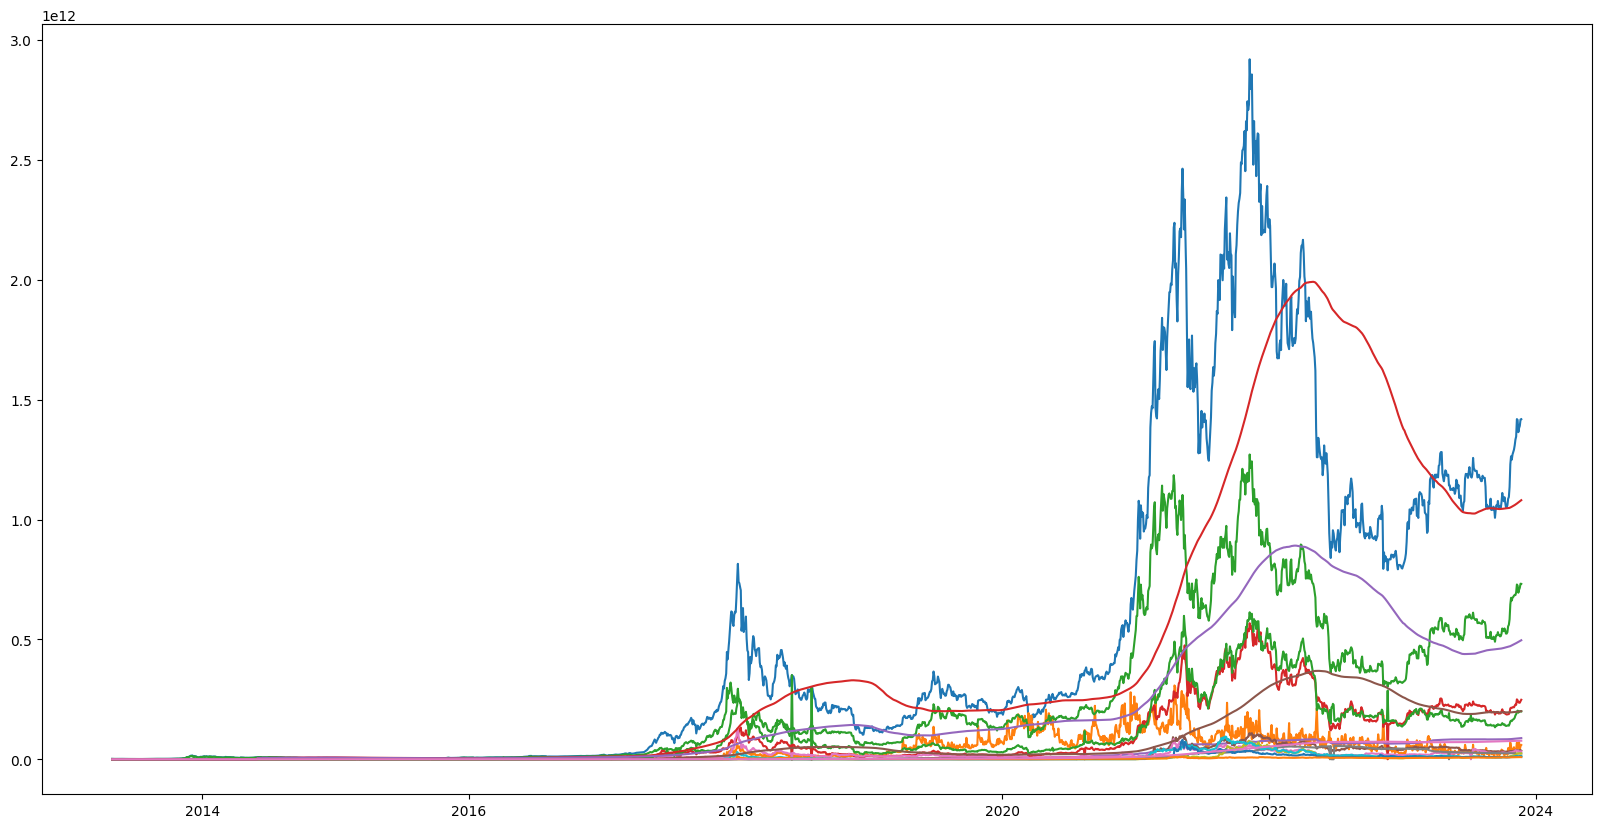

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df);

In [10]:
df_dominio = df_dominio.rolling(window=60).mean()

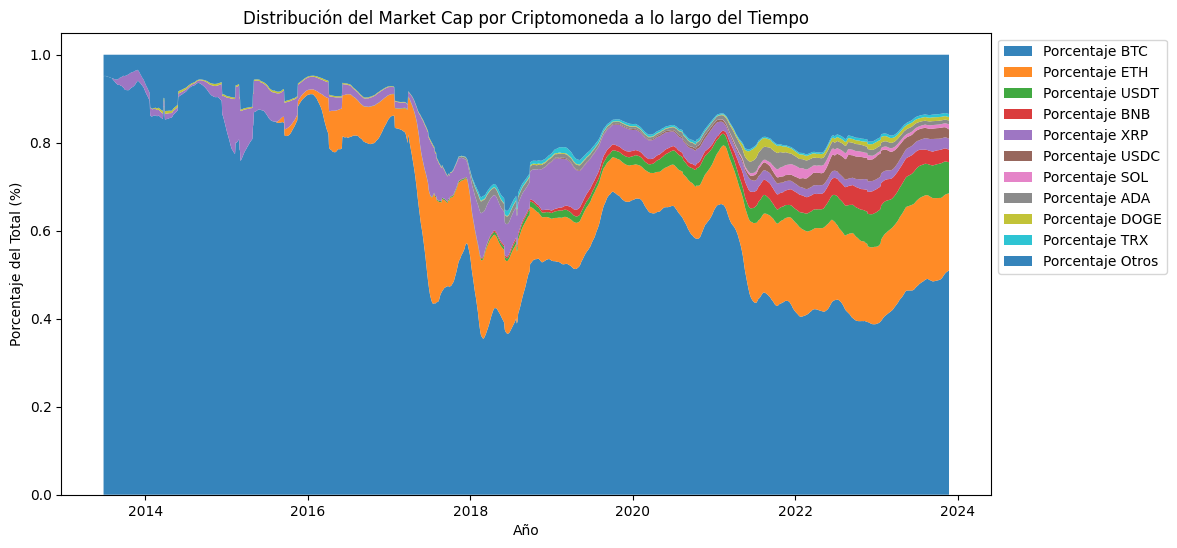

In [11]:
plt.figure(figsize=(12, 6))
plt.stackplot(df_dominio.index, df_dominio.T, labels=df_dominio.columns, alpha=0.9)
plt.xlabel('Año')
plt.ylabel('Porcentaje del Total (%)')
plt.title('Distribución del Market Cap por Criptomoneda a lo largo del Tiempo')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

#### En esta gráfica podemos apreciar como poco a poco Bitcoin va perdiendo su dominio y Ethereum logra alcanzar casi el 20% 

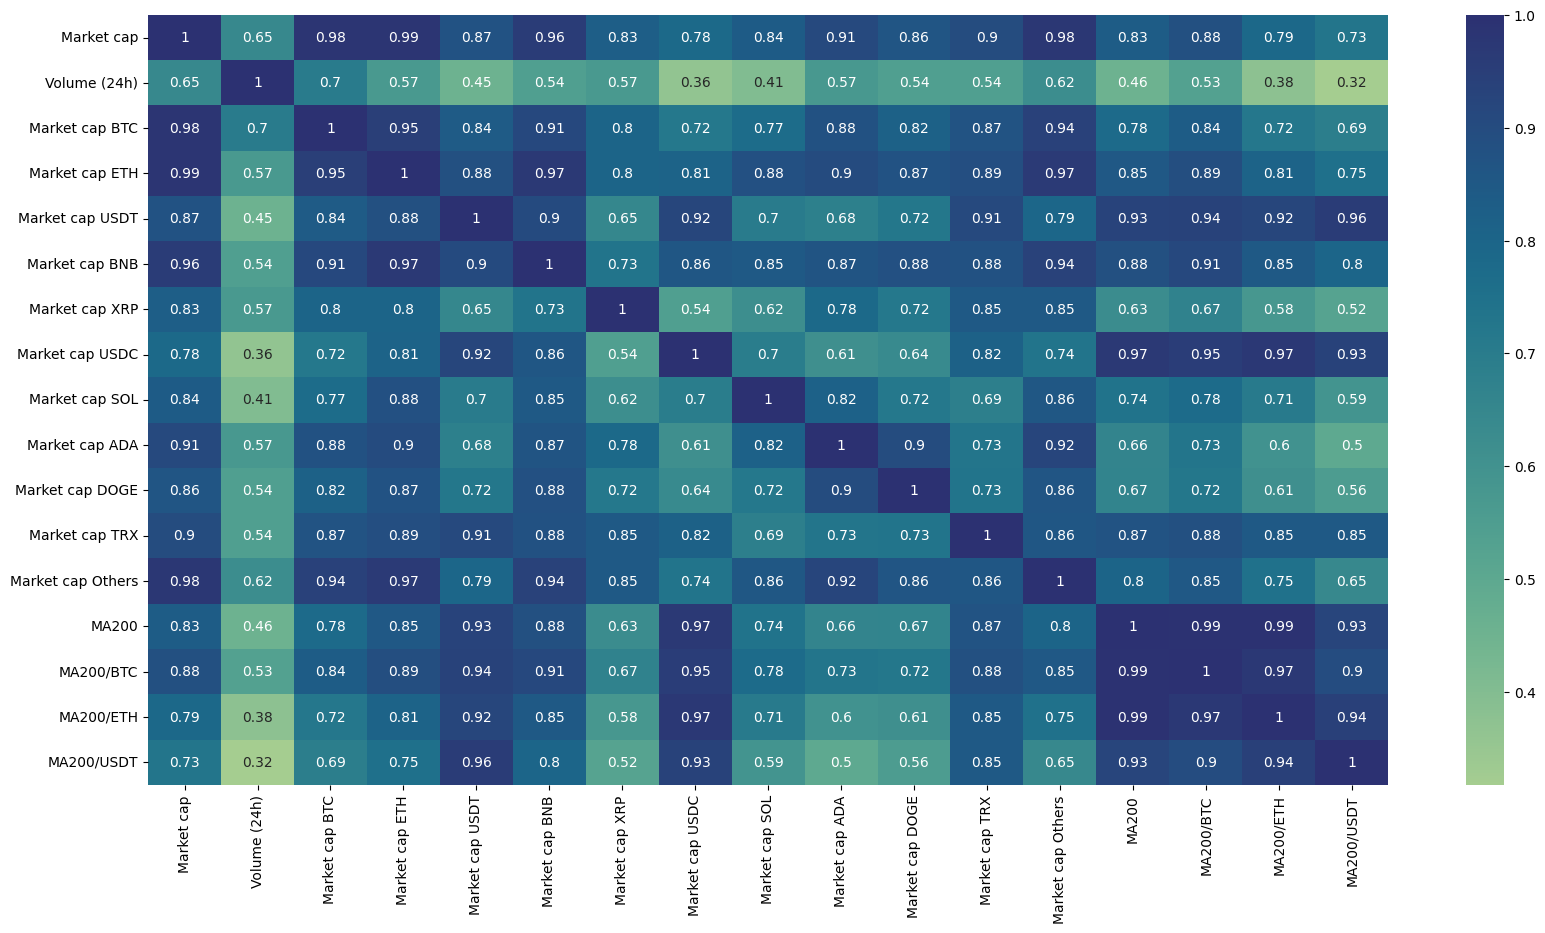

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="crest")
plt.show()


#### En este heatmap verificamos la alta correlación que tienen entre sí, en cambio, no es tan alta en relación al volumen total de operaciones en 24h, veamos una gráfica en cuanto a lo que el volumen se refiere para analizarlo más en profundidad:


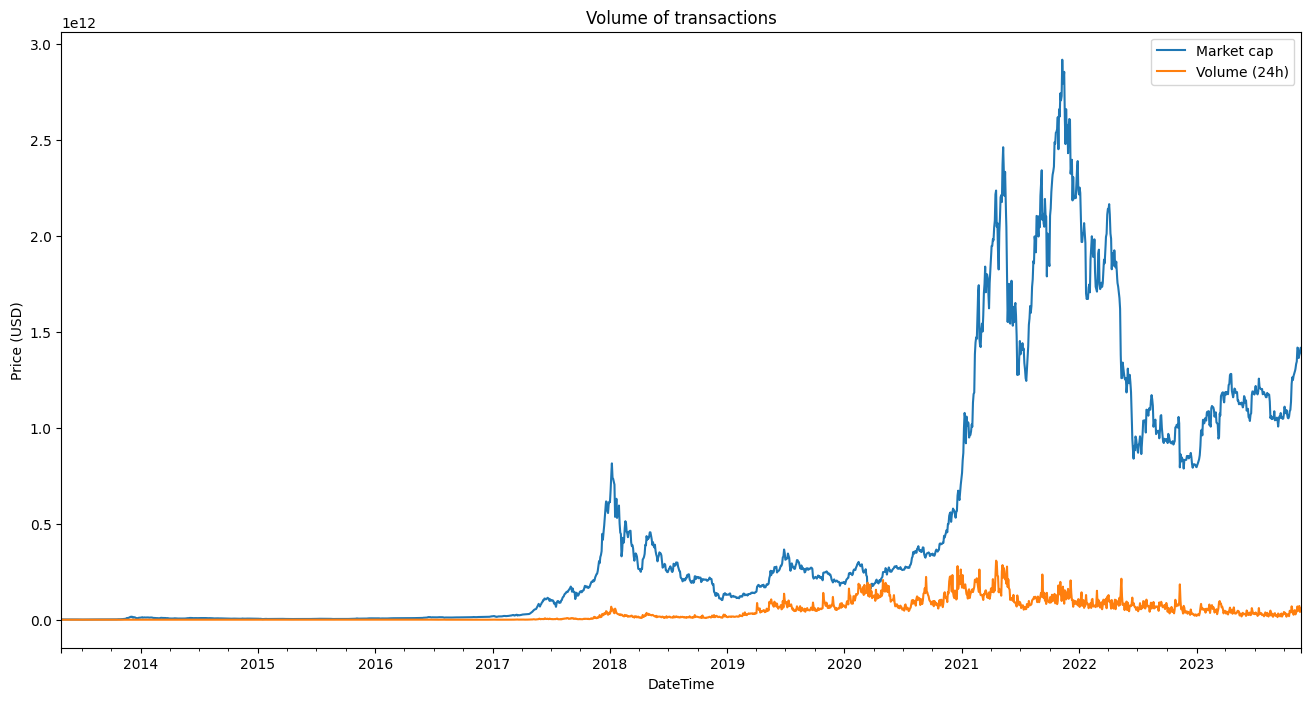

In [13]:
df[['Market cap', 'Volume (24h)']].plot(figsize = (16, 8))
plt.ylabel('Price (USD)')
plt.title('Volume of transactions');

#### Ahora con la gráfica en escala logarítmica

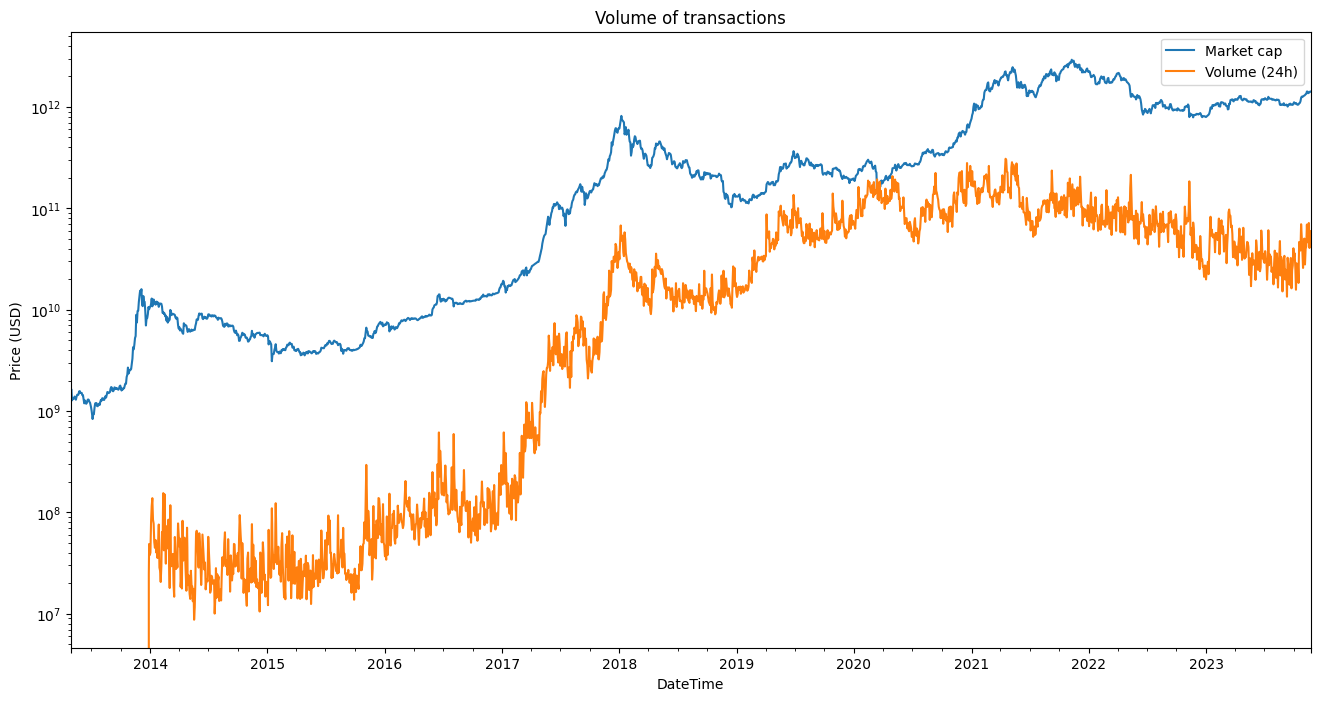

In [14]:
df[['Market cap', 'Volume (24h)']].plot(figsize = (16, 8))
plt.ylabel('Price (USD)')
plt.yscale('log')
plt.title('Volume of transactions');

# Conclusión

##### Sería relativamente fácil predecir el precio/capitalización de mercado de una criptomoneda si tenemos en cuenta el resto, pues hay correlaciones muy altas entre ellas.

##### En este caso, intentaremos predecir la futura capitalización de mercado y a partir de ello, el precio de la criptomoneda más dominante